In [47]:
library(dplyr)
library(readr)
install.packages("caret")
library(caret)
install.packages("survminer")
library(survminer)
install.packages("survival")
library(survival)
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [48]:

# Instalar y cargar las bibliotecas necesarias
install.packages("googledrive")
library(googledrive)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [49]:
# Autenticarse con Google Drive
drive_auth()

The googledrive package is requesting access to your Google account.
Enter '1' to start a new auth process or select a pre-authorized account.
1: Send me to the browser for a new auth process.
2: cesar.garcia@catolica.edu.sv


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=caf3308337f15dfbcc89e9f37f739d4d&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQVR4M0xZNGhXLXhUX1JYeENfaGNoTml3UTNwRzFiWC1Ob1ZIUWRhdlpDV2pXNllnNnV5bnlpVEFpdVoxeERKelY2X25YUSIsInN0YXRlIjoiY2FmMzMwODMzN2YxNWRmYmNjODllOWYzN2Y3MzlkNGQifQ==


In [50]:
# Especificar el ID del archivo y la ruta de destino
file_id <- "https://drive.google.com/file/d/1WDRKvrZrvSlQa8qNgUCoGwEyepYNm3dz/view?usp=drivesdk"  # Reemplaza este ID con el ID de tu archivo
drive_download(as_id(file_id), path = "archivo.csv", overwrite = TRUE)

File downloaded:

• Documento de César García <id: 1WDRKvrZrvSlQa8qNgUCoGwEyepYNm3dz>

Saved locally as:

• archivo.csv



In [51]:
# Leer el archivo CSV desde la URL
urlAge <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/machine_age.csv"
urlMechanic <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/mechanic_antiquity.csv"
df <- read_csv("archivo.csv", show_col_types = FALSE)
df_age <- read_csv(urlAge, show_col_types = FALSE)
df_mechanic <- read_csv(urlMechanic, show_col_types = FALSE)

In [52]:
summary(df)

   equipment        operation           wo_type           base_model       
 Min.   : 100268   Length:149066      Length:149066      Length:149066     
 1st Qu.:1023935   Class :character   Class :character   Class :character  
 Median :1078773   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1017279                                                           
 3rd Qu.:1149220                                                           
 Max.   :1169630                                                           
 problem_code       problem_desc       failure_code       failure_desc      
 Length:149066      Length:149066      Length:149066      Length:149066     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
      

In [53]:
head(df,5)

equipment,operation,wo_type,base_model,problem_code,problem_desc,failure_code,failure_desc,cause_code,cause_desc,⋯,action_desc,mechanic,date,downtime_gross,pit_coverage,real_downtime,parts_cost,repair_hours,waiting_hours,changed_pcs
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
100268,BIND LEG,Calibration,VF2500,SEWP001,It does not sew / No cose,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC001,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,⋯,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,Erick Garcia Lima,7/14/2023,0.08333333,0.08,0.003333333,$0.74,0.08333333,0,0
100268,BIND LEG,Corrective Maintenance,VF2500,SEWP002,It sews with defect / Cose con defecto,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC017,Misadjusted machine head teeth / Dientes de cabezal desajustados,⋯,Adjust machine head teeth / Ajustar dientes de cabezal,Jaime Rivera,10/3/2023,1.25000000,0.00,1.250000000,$16.81,1.25000000,0,1
100268,BIND LEG,Corrective Maintenance,VF2500,SEWP002,It sews with defect / Cose con defecto,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC017,Misadjusted machine head teeth / Dientes de cabezal desajustados,⋯,Adjust machine head teeth / Ajustar dientes de cabezal,Jaime Rivera,10/3/2023,1.25000000,0.00,1.250000000,$16.81,1.25000000,0,1
100268,BIND LEG,Corrective Maintenance,VF2500,SEWP002,It sews with defect / Cose con defecto,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC012,Misadjusted machine head needle bar / Barra de aguja de cabezal desajustada,⋯,Adjust machine head teeth / Ajustar dientes de cabezal,Jaime Rivera,1/17/2024,3.00000000,3.00,0.000000000,$12.50,2.00000000,1,2
100312,BARTACK,Corrective Maintenance,LT2-B872,SEWP001,It does not sew / No cose,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC005,Broken machine head ball joint / Rotura de biela de cabezal,⋯,Replace machine head ball joint / Reemplazar biela de cabezal,JERONIMO FUNEZ,3/18/2023,0.25000000,0.00,0.250000000,$2.67,0.25000000,0,0


**ANALISIS DE VARIABLES**

In [54]:
dim(df)

[1] 149066     21

In [55]:
# Calcular la frecuencia de cada operación
operation_freq <- df %>%
  group_by(operation) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
operation_freq <- operation_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))

operation_freq

operation,count,cum_count,cum_perc
<chr>,<int>,<int>,<dbl>
HEM SLEEVE,26821,26821,0.1799270
HEM BOTTOM,17016,43837,0.2940778
SET SLEEVE,8557,52394,0.3514819
JOIN PANEL,8537,60931,0.4087518
TAPE SHOULDER,8017,68948,0.4625334
HEM AROUND,5749,74697,0.5011002
FLAT SEAM,5521,80218,0.5381375
JOIN SHOULDER,5227,85445,0.5732025
ATTACH ELASTIC,4947,90392,0.6063891


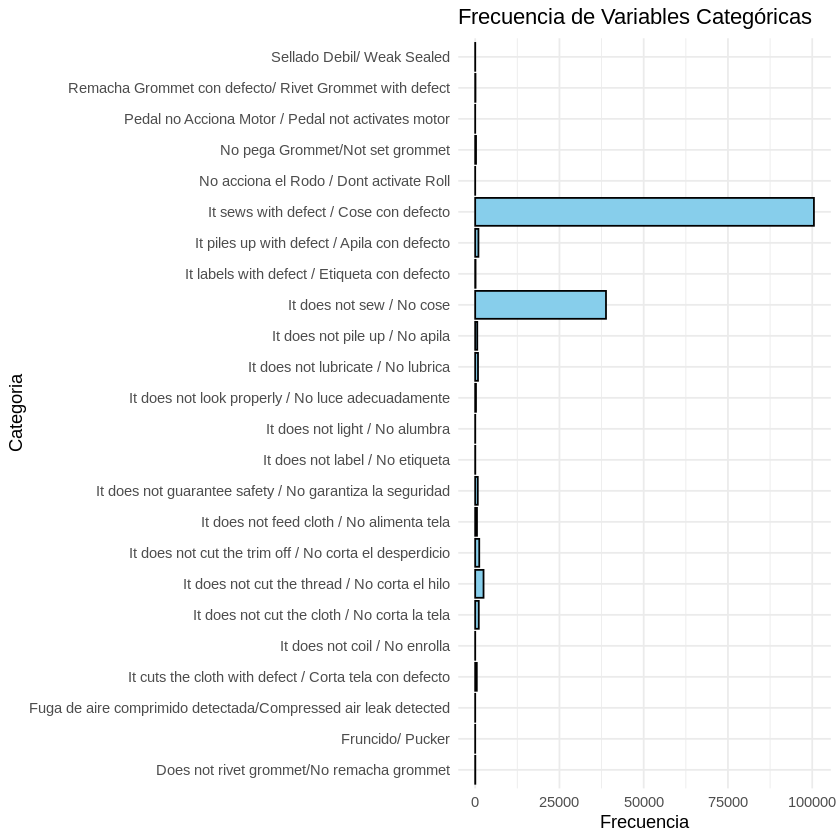

In [56]:
# Crear el gráfico de barras
ggplot(df, aes(y = problem_desc)) +
  geom_bar(fill = 'skyblue', color = 'black') +
  labs(title = 'Frecuencia de Variables Categóricas',
       x = 'Frecuencia',
       y = 'Categoria') +
  theme_minimal()

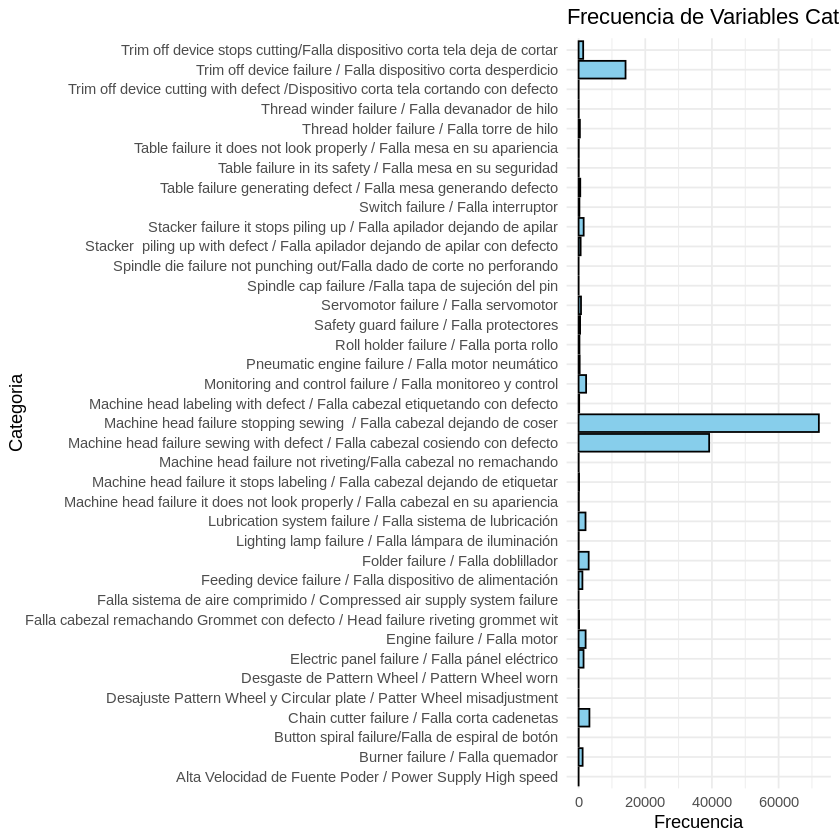

In [57]:
# Crear el gráfico de barras
ggplot(df, aes(y = failure_desc)) +
  geom_bar(fill = 'skyblue', color = 'black') +
  labs(title = 'Frecuencia de Variables Categóricas',
       x = 'Frecuencia',
       y = 'Categoria') +
  theme_minimal()

In [58]:
# Calcular la frecuencia de causas de fallo
cause_freq <- df %>%
  group_by(cause_desc) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
cause_freq <- cause_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))
cause_freq

cause_desc,count,cum_count,cum_perc
<chr>,<int>,<int>,<dbl>
Misadjusted machine head looper / Enlazador de cabezal desajustado,25580,25580,0.1716018
Damaged trim off system knife / Cuchilla de corta desperdicio en mal estado,13394,38974,0.2614547
Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,12673,51647,0.3464707
Broken machine head ball joint / Rotura de biela de cabezal,10551,62198,0.4172514
Misadjusted machine head presser foot / Prensatela de cabezal desajustado,6571,68769,0.4613326
Misadjusted machine head teeth / Dientes de cabezal desajustados,5966,74735,0.5013551
Misadjusted machine head chopper / Cuchilla de cabezal desajustada,5586,80321,0.5388284
Misadjusted machine head needle bar / Barra de aguja de cabezal desajustada,4890,85211,0.5716327
Oil leak in machine head / Fuga de aceite lubricante en cabezal,3802,89013,0.5971382


In [59]:
# Calcular la frecuencia de acciones correctivas
action_freq <- df %>%
  group_by(action_desc) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
action_freq <- action_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))
action_freq

action_desc,count,cum_count,cum_perc
<chr>,<int>,<int>,<dbl>
Adjust machine head looper / Ajustar enlazador de cabezal,19202,19202,0.1288154
Adjust machine head needle guard / Ajustar guarda aguja de cabezal,12738,31940,0.2142675
Replace machine head ball joint / Reemplazar biela de cabezal,10595,42535,0.2853434
Adjust machine head teeth / Ajustar dientes de cabezal,10218,52753,0.3538902
Sharpen knife / Afilar cuchillas,9449,62202,0.4172783
Replace machine head looper / Reemplazar enlazador de cabezal,8360,70562,0.4733608
Adjusted machine head presser foot / Ajustar prensatela de cabezal,7286,77848,0.5222385
Replace trim off knife / Reemplazar cuchilla de corta desperdicio,6334,84182,0.5647297
Adjust machine head knife / Ajustar cuchilla de cabezal,4311,88493,0.5936498


In [60]:
# Calcular la frecuencia de acciones correctivas
mechanic_freq <- df %>%
  group_by(mechanic) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
mechanic_freq <- mechanic_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))
mechanic_freq

mechanic,count,cum_count,cum_perc
<chr>,<int>,<int>,<dbl>
Antony Ulloa,3301,3301,0.02214455
Omar Maldonado,3231,6532,0.04381952
Jose Manuel Perez Zepeda,3168,9700,0.06507185
Erick Garcia Lima,2845,12545,0.08415735
DIEGO CUELLAR,2579,15124,0.10145841
Ronald Antonio Herrera,2566,17690,0.11867227
Carlos Alberto Alfaro Salamanca,2556,20246,0.13581903
Edwin Colindres,2460,22706,0.15232179
DENY RAYMUNDO PUCH POOL,2171,24877,0.16688581


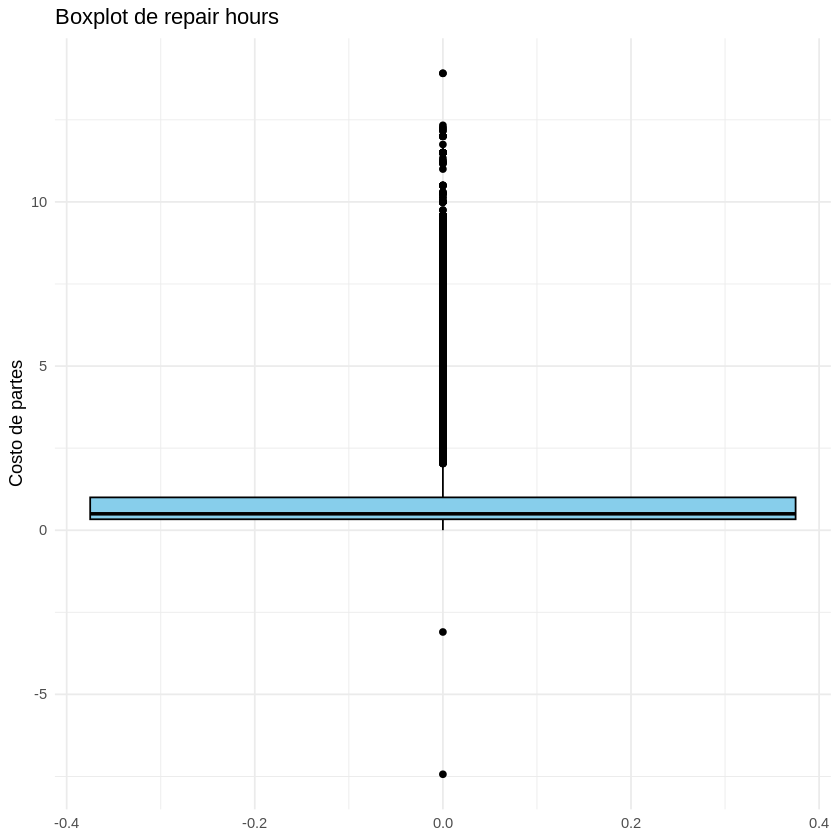

In [61]:
# Crear el boxplot de repair_hours
ggplot(df, aes(y = repair_hours)) +
  geom_boxplot(fill = 'skyblue', color = 'black') +
  labs(title = 'Boxplot de repair hours',
       y = 'Costo de partes') +
  theme_minimal()

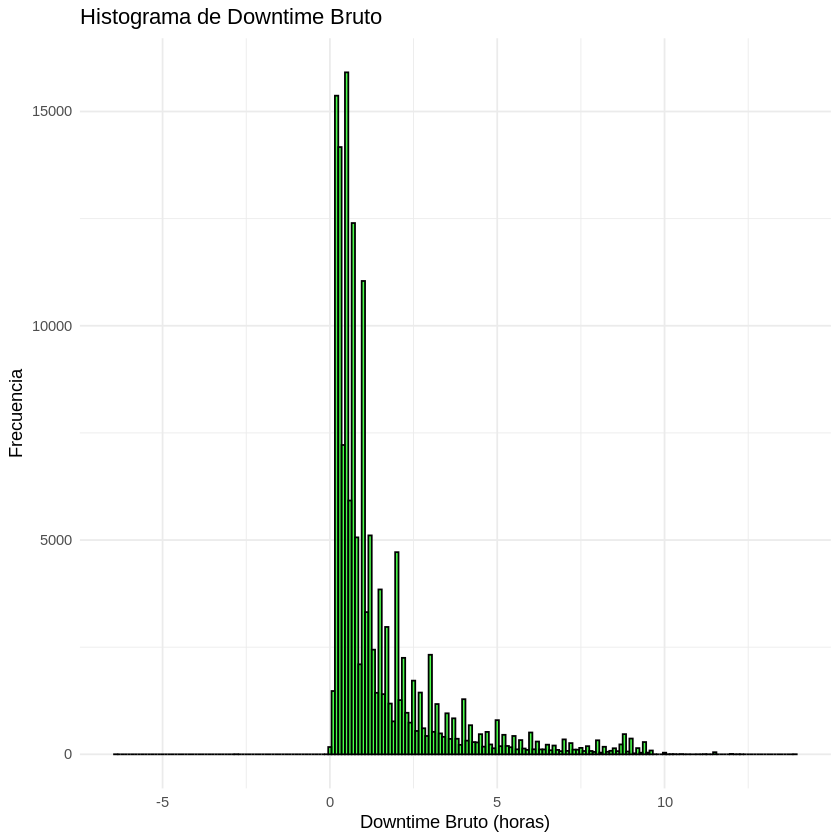

In [62]:
# Histograma de 'downtimeGross'
hist_downtimeGross <- ggplot(df, aes(x = downtime_gross)) +
  geom_histogram(binwidth = 0.1, fill = "green", color = "black", alpha = 0.7) +
  labs(title = "Histograma de Downtime Bruto",
       x = "Downtime Bruto (horas)",
       y = "Frecuencia") +
  theme_minimal()

# Mostrar histogramas
print(hist_downtimeGross)

**LIMPIEZA DE DATOS**

In [63]:
sapply(df, function(x) sum(is.na(x)))

equipment      operation        wo_type     base_model   problem_code 
             0              0              0              0              0 
  problem_desc   failure_code   failure_desc     cause_code     cause_desc 
             0              0              0              0              0 
   action_code    action_desc       mechanic           date downtime_gross 
             0              0              0              0              0 
  pit_coverage  real_downtime     parts_cost   repair_hours  waiting_hours 
             0              0              0              0              0 
   changed_pcs 
             0

In [64]:
# Remover el símbolo de dólar y las comas, y convertir a float
df$parts_cost <- as.numeric(gsub("[\\$,()]", "", df$parts_cost))

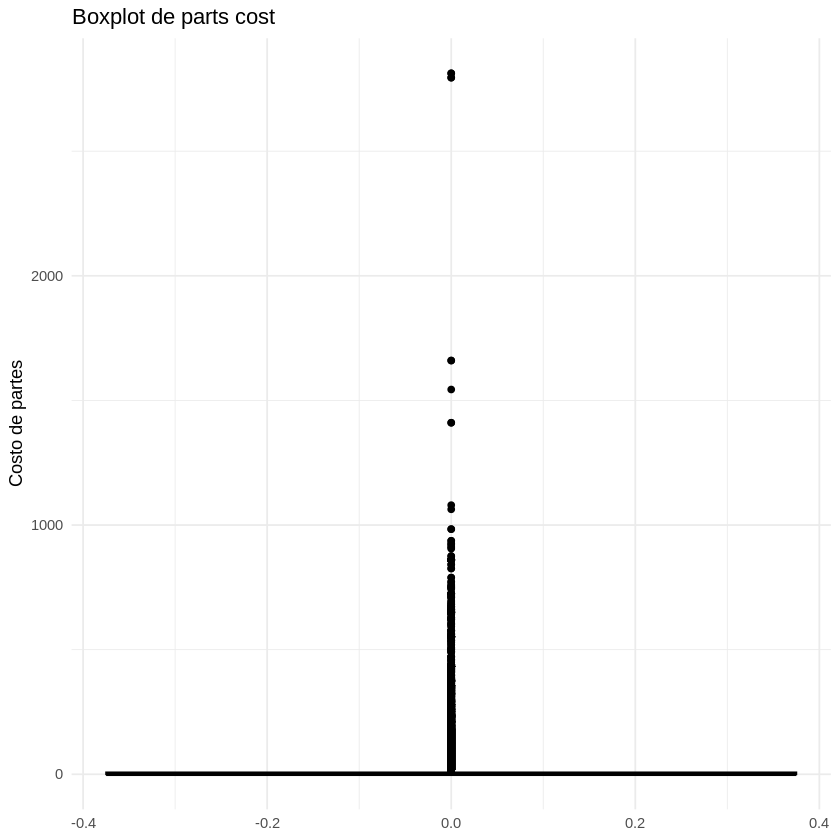

In [65]:
# Crear el boxplot de parts_cost
ggplot(df, aes(y = parts_cost)) +
  geom_boxplot(fill = 'skyblue', color = 'black') +
  labs(title = 'Boxplot de parts cost',
       y = 'Costo de partes') +
  theme_minimal()

In [66]:
# Convertir la columna 'Date' al formato adecuado
df$date <- as.Date(df$date, format="%m/%d/%Y")  # Ajusta el formato según tus datos
# Ordenar el DataFrame por fecha
df <- df %>%
  arrange(date)

In [67]:
mean(df$downtime_gross < 0)

[1] 2.683375e-05

In [68]:
# Filtrar registros donde downtimeGross no sea negativo
df_filtered <- df %>%
  filter(downtime_gross >= 0)

In [69]:
mean(df$repair_hours < 0)

[1] 1.341688e-05

In [70]:
# Calcular valor absoluto de repair hours
df$repair_hours <- abs(df$repair_hours)

In [71]:
#Eliminar columnas que no seran utilizadas
df <- select(df, -problem_code, -failure_code, -cause_code, -action_code, -pit_coverage, -real_downtime, -waiting_hours)

In [72]:
# Filtrar el DataFrame por 'WO Type' igual a 'Corrective Maintenance'
df <- df %>%
  filter(`wo_type` == "Corrective Maintenance")

In [73]:
# Calcular la diferencia en días entre fechas consecutivas
df <- df %>%
  group_by(equipment) %>%
  mutate(Days_Between_Failures = difftime(date, lag(date), units = "days"))

# Reemplazar los valores NA en Days_Between_Failures
df$Days_Between_Failures[is.na(df$Days_Between_Failures)] <- as.numeric(difftime(df$date[is.na(df$Days_Between_Failures)], as.Date("2023-01-01"), units = "days"))

In [74]:
# Convertir 'Days_Between_Failures' a numeric
df$Days_Between_Failures <- as.numeric(df$Days_Between_Failures, units = "days")

In [75]:
#Cambio de nombre de mecánico cuyo nombre está escrito de dos formas
df <- df %>%
  mutate(mechanic = ifelse(mechanic == "GALEAS PEREZ EDWIN ROGELIO", "Edwin Rogelio Galeas Perez", mechanic))

**ANALISIS DE VARIABLE OBJETIVO**

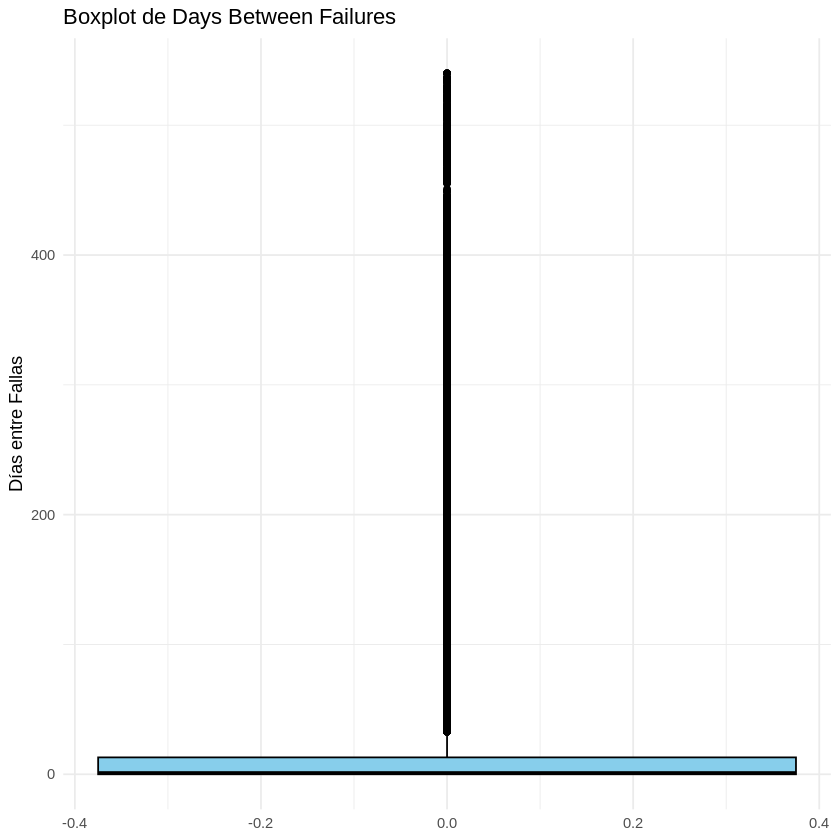

In [76]:
# Crear el boxplot de daysbetween_failures
ggplot(df, aes(y = Days_Between_Failures)) +
  geom_boxplot(fill = 'skyblue', color = 'black') +
  labs(title = 'Boxplot de Days Between Failures',
       y = 'Días entre Fallas') +
  theme_minimal()

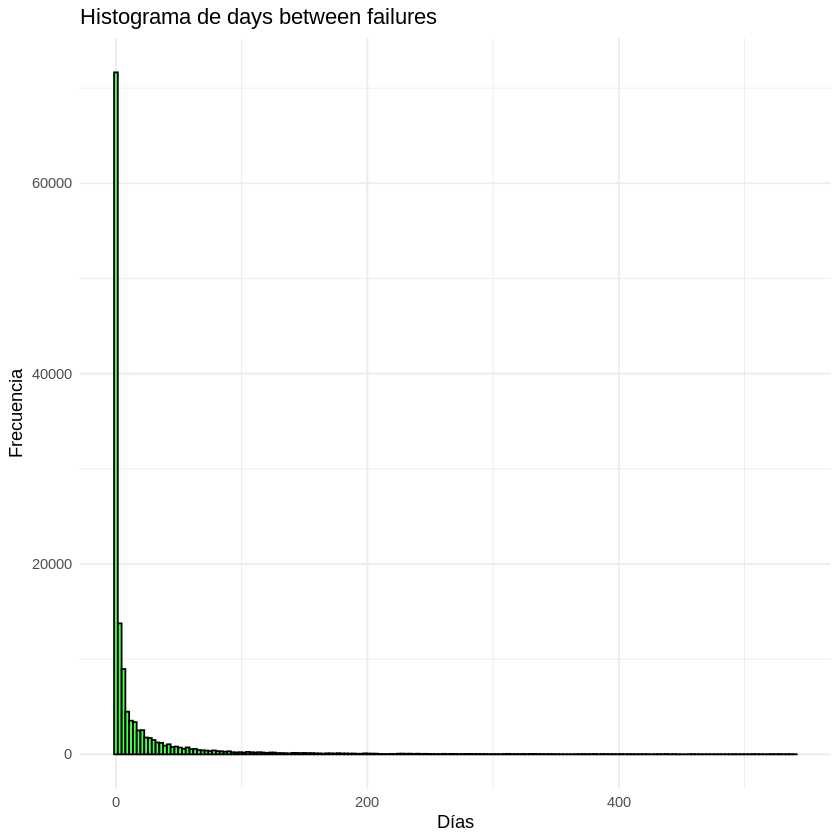

In [77]:
# Histograma de 'Days_Between_Failures'
hist_days_failures <- ggplot(df, aes(x = Days_Between_Failures)) +
  geom_histogram(binwidth = 3, fill = "green", color = "black", alpha = 0.7) +
  labs(title = "Histograma de days between failures",
       x = "Días",
       y = "Frecuencia") +
  theme_minimal()

# Mostrar histogramas
print(hist_days_failures)

**MODELO DE REGRESION LINEAL INICIAL PARA PREDECIR DOWNTIME**



In [78]:
df <- select(df, -wo_type)

In [79]:
head(df,5)

equipment,operation,base_model,problem_desc,failure_desc,cause_desc,action_desc,mechanic,date,downtime_gross,parts_cost,repair_hours,changed_pcs,Days_Between_Failures
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1011144,HEM SLEEVE,VC2700,It does not cut the trim off / No corta el desperdicio,Trim off device failure / Falla dispositivo corta desperdicio,Damaged trim off system knife / Cuchilla de corta desperdicio en mal estado,Sharpen knife / Afilar cuchillas,DIEGO CUELLAR,2023-01-03,0.1666667,51.00,0.1666667,0,2
1013453,TOP STITCH,VC2713,It sews with defect / Cose con defecto,Machine head failure stopping sewing / Falla cabezal dejando de coser,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,Adalberto Jeremias Rodriguez Zometa,2023-01-03,1.0000000,19.20,1.0000000,1,2
1013453,TOP STITCH,VC2713,It sews with defect / Cose con defecto,Machine head failure stopping sewing / Falla cabezal dejando de coser,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,Adalberto Jeremias Rodriguez Zometa,2023-01-03,1.0000000,19.20,1.0000000,1,0
1027243,SET SLEEVE,VC2700,It sews with defect / Cose con defecto,Machine head failure sewing with defect / Falla cabezal cosiendo con defecto,Oil leak in machine head / Fuga de aceite lubricante en cabezal,Fix machine head oil leak / Corregir fuga de aceite en cabezal,RAMON VILLANUEVA,2023-01-03,0.5000000,60.69,0.5000000,1,2
1027243,SET SLEEVE,VC2700,It sews with defect / Cose con defecto,Machine head failure sewing with defect / Falla cabezal cosiendo con defecto,Oil leak in machine head / Fuga de aceite lubricante en cabezal,Fix machine head oil leak / Corregir fuga de aceite en cabezal,RAMON VILLANUEVA,2023-01-03,0.5000000,60.69,0.5000000,1,0


In [80]:
# Inicializar y ajustar el modelo de regresión lineal
model1 <- lm(downtime_gross~. -equipment -downtime_gross -repair_hours -Days_Between_Failures -date, data = df)
# Resumen del modelo
summary(model1)


Call:
lm(formula = downtime_gross ~ . - equipment - downtime_gross - 
    repair_hours - Days_Between_Failures - date, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2675 -0.5537 -0.1519  0.2042  9.7936 

Coefficients: (9 not defined because of singularities)
                                                                                               Estimate
(Intercept)                                                                                   6.183e-01
operationATTACH ELASTIC                                                                       1.047e-01
operationBARTACK                                                                             -4.994e-02
operationBIND ARM                                                                            -2.367e-01
operationBIND ARMHOLE                                                                        -1.268e-02
operationBIND LEG                                                                            -1

**CALCULO DE VARIABLES PARA MEJORA DEL AJUSTE**

In [81]:
#Calcular los fallos acumulativos
df <- df %>%
  group_by(equipment) %>%
  mutate(Cumulative_Failure_Count = row_number())

In [82]:
# Calcular la mediana de tiempo de reparación
df <- df %>%
  group_by(equipment) %>%
  mutate(Median_Repair_Time = median(repair_hours, na.rm = TRUE))

In [83]:
# Calcular el costo acumulado de mantenimiento
df <- df %>%
  group_by(equipment) %>%
  mutate(Cumulative_Maintenance_Cost = cumsum(parts_cost))

**MODELO DE REGRESION LINEAL PARA PREDECIR DOWNTIME CON MAS VARIABLES**

In [84]:
# Inicializar y ajustar el modelo de regresión lineal
model2 <- lm(downtime_gross~. -equipment -downtime_gross -repair_hours -date, data = df)
# Resumen del modelo
summary(model2)


Call:
lm(formula = downtime_gross ~ . - equipment - downtime_gross - 
    repair_hours - date, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3019 -0.5550 -0.1515  0.2058  9.7020 

Coefficients: (9 not defined because of singularities)
                                                                                               Estimate
(Intercept)                                                                                   5.044e-01
operationATTACH ELASTIC                                                                       1.281e-01
operationBARTACK                                                                             -3.599e-02
operationBIND ARM                                                                            -1.983e-01
operationBIND ARMHOLE                                                                         5.750e-03
operationBIND LEG                                                                            -1.402e-01
operationBIND N

**MODELO AGREGANDO LA VARIABLE "MACHINE AGE"**

In [85]:
# Renombrar la columna 'Equipment' a 'equipment' en df_age
df_age <- df_age %>% rename(equipment = Equipment)

In [86]:
df_merged <- df %>%
  left_join(df_age %>% select(equipment, Age), by = "equipment")

In [87]:
head(df_merged,3)

equipment,operation,base_model,problem_desc,failure_desc,cause_desc,action_desc,mechanic,date,downtime_gross,parts_cost,repair_hours,changed_pcs,Days_Between_Failures,Cumulative_Failure_Count,Median_Repair_Time,Cumulative_Maintenance_Cost,Age
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1011144,HEM SLEEVE,VC2700,It does not cut the trim off / No corta el desperdicio,Trim off device failure / Falla dispositivo corta desperdicio,Damaged trim off system knife / Cuchilla de corta desperdicio en mal estado,Sharpen knife / Afilar cuchillas,DIEGO CUELLAR,2023-01-03,0.1666667,51.0,0.1666667,0,2,1,0.5,51.0,26
1013453,TOP STITCH,VC2713,It sews with defect / Cose con defecto,Machine head failure stopping sewing / Falla cabezal dejando de coser,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,Adalberto Jeremias Rodriguez Zometa,2023-01-03,1.0000000,19.2,1.0000000,1,2,1,1.0,19.2,23
1013453,TOP STITCH,VC2713,It sews with defect / Cose con defecto,Machine head failure stopping sewing / Falla cabezal dejando de coser,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,Adalberto Jeremias Rodriguez Zometa,2023-01-03,1.0000000,19.2,1.0000000,1,0,2,1.0,38.4,23


In [88]:
# Inicializar y ajustar el modelo de regresión lineal
model3 <- lm(downtime_gross~. -equipment -downtime_gross -repair_hours -date, data = df_merged)
# Resumen del modelo
summary(model3)


Call:
lm(formula = downtime_gross ~ . - equipment - downtime_gross - 
    repair_hours - date, data = df_merged)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2982 -0.5550 -0.1515  0.2063  9.6918 

Coefficients: (9 not defined because of singularities)
                                                                                               Estimate
(Intercept)                                                                                   4.905e-01
operationATTACH ELASTIC                                                                       1.227e-01
operationBARTACK                                                                             -3.187e-02
operationBIND ARM                                                                            -2.041e-01
operationBIND ARMHOLE                                                                        -3.484e-05
operationBIND LEG                                                                            -1.435e-01
operatio

**MODELO AGREGANDO LA VARIABLE "MECHANIC ANTIQUITY"**

In [89]:
df_merged2 <- df_merged %>%
  left_join(df_mechanic %>% select(mechanic, antiquity), by = "mechanic")

In [90]:
# Inicializar y ajustar el modelo de regresión lineal
model4 <- lm(downtime_gross~. -equipment -downtime_gross -repair_hours -date, data = df_merged2)
# Resumen del modelo
summary(model4)


Call:
lm(formula = downtime_gross ~ . - equipment - downtime_gross - 
    repair_hours - date, data = df_merged2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2982 -0.5550 -0.1515  0.2063  9.6918 

Coefficients: (10 not defined because of singularities)
                                                                                               Estimate
(Intercept)                                                                                   4.905e-01
operationATTACH ELASTIC                                                                       1.227e-01
operationBARTACK                                                                             -3.187e-02
operationBIND ARM                                                                            -2.041e-01
operationBIND ARMHOLE                                                                        -3.484e-05
operationBIND LEG                                                                            -1.435e-01
operat

**IMPLEMENTACION DE BACKWARD**

In [91]:
sapply(df_merged2, function(x) sum(is.na(x)))

equipment                   operation 
                          0                           0 
                 base_model                problem_desc 
                          0                           0 
               failure_desc                  cause_desc 
                          0                           0 
                action_desc                    mechanic 
                          0                           0 
                       date              downtime_gross 
                          0                           0 
                 parts_cost                repair_hours 
                          0                           0 
                changed_pcs       Days_Between_Failures 
                          0                           0 
   Cumulative_Failure_Count          Median_Repair_Time 
                          0                           0 
Cumulative_Maintenance_Cost                         Age 
                          0                           0 
                  antiquity 
                          0

In [92]:
head(df_mechanic,50)

mechanic,antiquity
<chr>,<dbl>
RIVAS TORRES CARLOS ANTONIO,19
Marvin Betancourth,18
JUAN BAAK CHIN,17
GRACIELA BEATRIZ CALLEGOS CANCHE,19
DILSY RAQUELINE COUOH LOPEZ,25
HECTOR OXTE EK,17
NELSON GUILLEN,18
ANGEL MATAMOROS,18
Carlos Enrique Rodriguez,19


In [ ]:
# Realizar backward elimination
model_final <- step(model5, direction = "backward")
model_final$anova

In [ ]:
formula = as.formula("Days_Between_Failures ~ operation + base_model + mechanic + downtime_gross +
    parts_cost + Cumulative_Failure_Count + Median_Repair_Time +
    Cumulative_Maintenance_Cost + Age")

In [ ]:
# Inicializar y ajustar el modelo de regresión lineal
model6 <- lm(formula = formula, data = df_merged3)
# Resumen del modelo
summary(model6)

**ANALISIS DE SUPERVIVENCIA PARA MAQUINARIA DE RUEDO DE MANGA**

In [ ]:
# Cargar datos
url <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/maquina2.csv"
data <- read_csv(url, show_col_types = FALSE)

In [ ]:
head(data,5)

In [ ]:
# Filtrar el DataFrame por 'WO Type' igual a 'Corrective Maintenance'
data <- data %>%
  filter(`WO Type` == "Corrective Maintenance")
data <- data%>%
  filter(Operation == "HEM SLEEVE")

In [ ]:
# Convertir la columna 'Date' al formato adecuado
data$Date <- as.Date(data$Date, format="%m/%d/%Y")  # Ajusta el formato según tus datos

# Ordenar por equipo y fecha
data <- data %>% arrange(Equipment, Date)

# Calcular el tiempo entre fallas y si la falla ocurrió
data <- data %>%
  group_by(Equipment) %>%
  mutate(Previous_Failure_Date = lag(Date),
         Days_Between_Failures = as.numeric(Date - Previous_Failure_Date),
         Event_Occurred = ifelse(is.na(Previous_Failure_Date), 0, 1)) %>%
  ungroup()

# Eliminar filas con NA en 'Days_Between_Failures'
data <- data %>% filter(!is.na(Days_Between_Failures))

In [ ]:
head(data,5)

In [ ]:
# Convertir las variables categóricas a factores
data$Equipment <- as.factor(data$Equipment)
data$Operation <- as.factor(data$Operation)
data$Model.Base <- as.factor(data$`Model Base`)
data$Problem.Code <- as.factor(data$`Problem Code`)
data$Failure.Code <- as.factor(data$`Failure Code`)
data$Cause.Code <- as.factor(data$`Cause Code`)
data$Action.Code <- as.factor(data$`Action Code`)

In [ ]:
cox_model <- coxph(Surv(Days_Between_Failures, Event_Occurred) ~
                  Model.Base + Problem.Code + Failure.Code + Cause.Code +
                   Action.Code + downtimeGross + partsCost +repairHours, data = data)

In [ ]:
# Resumen del modelo
summary(cox_model)

In [ ]:
# Curvas de supervivencia ajustadas
fit <- survfit(cox_model)
ggsurvplot(fit, data = data, risk.table = TRUE, pval = TRUE,
           title = "Curvas de Supervivencia Ajustadas",
           xlab = "Tiempo (días)", ylab = "Probabilidad de Supervivencia")


In [ ]:
# Imprimir el resumen del ajuste para ver la mediana de supervivencia
summary_fit <- summary(fit)
print(summary_fit)

# Obtener la mediana de supervivencia
median_survival <- summary_fit$time[which.min(abs(summary_fit$surv - 0.5))]
print(paste("La mediana de supervivencia es:", median_survival, "días"))

In [ ]:
library(ggplot2)
library(survminer)

# Graficar la curva de supervivencia con la mediana de supervivencia resaltada
plot <- ggsurvplot(fit, data = data, risk.table = TRUE, pval = TRUE,
                   title = "Curvas de Supervivencia Ajustadas",
                   xlab = "Tiempo (días)", ylab = "Probabilidad de Supervivencia",
                   conf.int = TRUE)

# Añadir línea vertical y anotación para la mediana de supervivencia
plot$plot <- plot$plot +
  geom_vline(xintercept = median_survival, linetype = "dashed", color = "red") +
  annotate("text", x = median_survival, y = 0.5, label = paste("Mediana =", median_survival, "días"), vjust = -1, color = "red")

print(plot)